<h1><center>KING COUNTY HOUSE PRICES REDICTION MODEL</center></h1>

#### <center>MULTIPLE LINEAR REGRESSION ANALYSIS</center>

##### BY: Omolewa DAVIDS
***

The dataset used for this project was acquired from Kaggle. This Dataset which was provided by King County, Washington, include data of houses sold between May 2014 and May 2015.

The goal of this project was to develop a linear model to predict the price of houses in King County, Washington. Additionally, during the process, the dataset will be explored to get detail overview of the dataset (Exploratory Data Analysis)

<div class="alert alert-block alert-info">
    
### Table of Contents

* [Import Libraries](#section_1)
* [Load the Dataset into Dataframe](#section_2)
* [Overview of the Dataset](#section_3)
* [MultiCollinearity Check](#section_4)
* [Build the Model](#section_5)
* [Evaluating the Model](#section_6)
* [Remove the Insignificant Variables](#section_7)
* [Saving the Model for Future Use](#section_8)

<a id="section_0"></a>
***

<div class="alert alert-block alert-info">
<a id="section_1"></a>
    
### Assumptions of the Model
We nned to understand the assumptions of the model. If any assumption is violated, then we have to take extra step to improve the model or we drop the model altogether
* Regression residuals must be normaly distributed
* A linear relationship is assumed between the dependent variable and the indeppendent variable
* The residuals are homoscedastic and approximately regular shaped
* Absence of Multicollinearity is expected in the model
* No autocorellation of the residuals

***
__[Assumption of Linear Regression](https://www.statisticssolutions.com/assumptions-of-linear-regression/)__

<div class="alert alert-block alert-info">
   
#### SECTION 1: IMPORT THE LIBRARIES

<a id="section_1"></a>

* click here to go back to [Table of Contents](#section_0)

> These are the python libraries that we need for this project. We need Matplotlib and Seaborn to create our visuals. Sklearn library to create our model and use statsmodels library for the evaluation or our model
***

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import pylab
import math
from scipy import stats
import statsmodels.api as sm
from statsmodels.stats import diagnostic as diag
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

<div class="alert alert-block alert-info">
    
### SECTION 2: LOAD THE DATASET INTO DATAFRAME

<a id="section_2"></a>

* click here to go back to [Table of Contents](#section_0)

> We will be performing a multiple linear regression analysis on **KINGS COUNTY HOUSING DATASET**. The goal is to explore the dataset and generate a model to predict the price of Houses in Kings County <br>

> After loading the libraries, we can begin the process of importing and exploring the data. After we have loaded the data into the dataframe, we start our data munging, which is the process of transforming and mapping the data with the intent of making it more appropriate and valuable for the downstream purpose of our analytics and modelling
***

In [13]:
# Load the data into pandas and set the na_values=["nan","n.a","not available","?","NaN"]
data_df = pd.read_csv('https://raw.githubusercontent.com/Amberlynnyandow/dsc-1-final-project-online-ds-ft-021119/master/kc_house_data.csv', na_values=["nan","n.a","not available","?","NaN"])

In [67]:
!pip install folium

In [70]:
import folium
import pandas as pd
import json
from folium import plugins

In [71]:
data = pd.DataFrame({
    'lat' :[-58, 2, 145, 30.32, -4.03, -73.57, 36.82, -38.5],
    'long' : [-34, 49, -38, 59.93, 5.33, 45.52, -1.29, -12.97],
})

In [73]:
m = folium.Map(location=[20,0], tiles="Mapbox Bright", zoom_start=2)

In [78]:
for i in range(0, len(data_df)):
    folium.Marker([data_df.iloc[i]['long'], data_df.iloc[i]['lat']]).add_to(m)

In [81]:
m.save('312_markers_on_folium_map2.html')


<div class="alert alert-block alert-info">
    
### SECTION 3: OVERVIEW OF THE DATASET

<a id="section_3"></a>

* click here to go back to [Table of Contents](#section_0)

In [5]:
data_df.columns # Take a look at the column names

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

| Variables | Discription |
| --- | --- |
| id | Unique ID for each Houses |
| Date | Date of House sale |
| Price | Price of each Houses |
| Bedrooms | Number of bedrooms |
| Bathrooms | Number of Bathrooms |
| Sqft_living | Square footage of Interior living spasce |
| Sqft_lot | Square footage of the land space |
| Floors | Number of floors |
| Waterfront | Shows Whether the House is Overlooking waterfront or not |
| View | Shows how good the house looks |
| Condition | An index from 1 - 5 on the condition of the houses |
| Grade | An index 0f 1 - 13 given by the Government |
| Sqft_above | Square footage of the interior housing space above the ground |
| Sqft_basement | Square footage of the interior housing space below the ground |
| Yr_built | The year the house was initially built |
| Yr_renovated | The last year the house was renovated |
| Zipcode | The zipcode of the houses |
| Lat | Latitudinal location of the house |
| Long | Longitudinal location of the house |
| Sqft_living15 | Sqaure footage of the interior housing living space for nearest 15 houses |
| Sqft_lot15 | THe Square footage of lot for the nearest 15 houses |


#### Data PreProcessing :

***

> Before we start with the model creation, we should summarize the attributes in our dataset and objectively compare them with the goal expectations. We have target metrics whose relationship we want to analyse with the attributes in our data. This is know as **KEY PERFORMANCE INDICATOR (KPI)**

In [21]:
data_df.head() # Check the top 5 rows of the dataset

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [22]:
data_df.tail() # Check the bottom 5 rows of the dataset

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,0.0,0.0,...,8,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,0.0,0.0,...,8,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,0.0,0.0,...,7,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,NaN,0.0,...,8,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287
21596,1523300157,10/15/2014,325000.0,2,0.75,1020,1076,2.0,0.0,0.0,...,7,1020,0.0,2008,0.0,98144,47.5941,-122.299,1020,1357


In [91]:
# Rename the condition categories so as to be able to group the dataset by conditions
data_df['condition'].replace({1 : 'Bad', 2 : 'Not_Good', 3 : 'Good', 4 : 'Very_Good', 5 : 'Excellent'}, inplace=True)

In [7]:
data_df['condition'].head()  # Validate the change we just made

0         Good
1         Good
2         Good
3    Excellent
4         Good
Name: condition, dtype: object

In [8]:
data_df.info() # Get more info about the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null object
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21143 non-null float64
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(9), int64(10), object(2)
memory usage: 3.5+ MB


In [9]:
data_df.shape # Get the total number of rows and columns

(21597, 21)

> Dataset comprises of 21597 observations and 21 characteristics.
> Out of which one (price) is dependent variable and rest 20 are independent variables.
> Check if there is any missing data

In [10]:
# Set the index equal to id column
data_df.index = data_df['id']

In [11]:
data_df = data_df.drop('id', axis = 1)

In [12]:
data_df.isnull().sum() # Check for missing data

date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement     454
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [14]:
# Take value counts for each of the columns missing datas
data_df['waterfront'].value_counts(), data_df['sqft_basement'].value_counts(), data_df['yr_renovated'].value_counts(), data_df['view'].value_counts()

(0.0    19075
 1.0      146
 Name: waterfront, dtype: int64, 0.0       12826
 600.0       217
 500.0       209
 700.0       208
 800.0       201
 400.0       184
 1000.0      148
 900.0       142
 300.0       142
 200.0       105
 750.0       104
 450.0       103
 530.0       103
 480.0       103
 720.0        98
 620.0        90
 580.0        84
 840.0        83
 420.0        81
 860.0        79
 670.0        78
 1100.0       78
 780.0        76
 550.0        76
 650.0        75
 240.0        74
 680.0        73
 380.0        73
 850.0        72
 360.0        72
           ...  
 2600.0        1
 2610.0        1
 276.0         1
 274.0         1
 1245.0        1
 143.0         1
 266.0         1
 862.0         1
 2180.0        1
 415.0         1
 243.0         1
 1135.0        1
 1525.0        1
 3000.0        1
 172.0         1
 225.0         1
 518.0         1
 935.0         1
 1920.0        1
 1930.0        1
 1990.0        1
 588.0         1
 1548.0        1
 2390.0        1
 602.

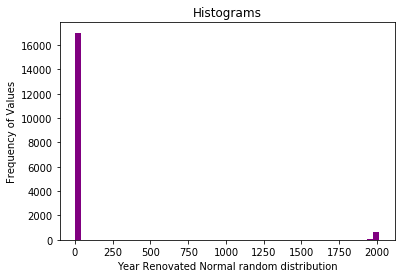

In [18]:
plt.hist(data_df['yr_renovated'], bins=50, color='purple')
plt.xlabel('Year Renovated Normal random distribution')
plt.ylabel('Frequency of Values')
plt.title('Histograms')
plt.show()

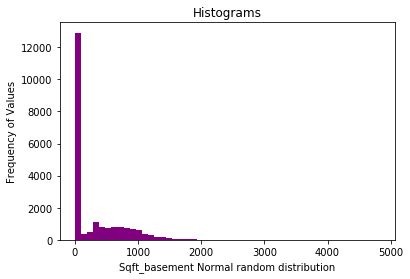

In [23]:
plt.hist(data_df['sqft_basement'], bins=50, color='purple')
plt.xlabel('Sqft_basement Normal random distribution')
plt.ylabel('Frequency of Values')
plt.title('Histograms')
plt.show()

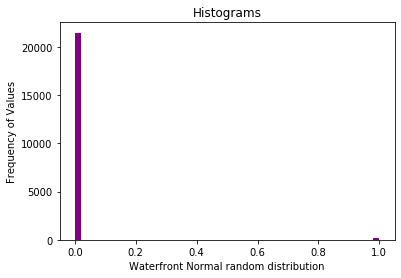

In [22]:
plt.hist(data_df['waterfront'], bins=50, color='purple')
plt.xlabel('Waterfront Normal random distribution')
plt.ylabel('Frequency of Values')
plt.title('Histograms')
plt.show()

> These distributions justify replacing the missing data by the mode of the distribution 

In [28]:
# Replace all missing data with the mode in each 
data_df = data_df.fillna({'yr_renovated': data_df['yr_renovated'].mode(), 'sqft_basement': data_df['sqft_basement'].mode(), 'view': 0, 'waterfront': 0})

In [29]:
data_df['waterfront'].unique()

array([0., 1.])

In [30]:
data_df.isnull().sum() # Check for missing data again

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront          0
view                0
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [35]:
data_df.describe() # Get the statistics about the Dataset

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.006760,0.233181,7.657915,1788.596842,291.851724,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.081944,0.764673,1.173200,827.759761,437.822440,29.375234,362.629604,53.513072,0.138552,0.140724,685.230472,27274.441950
min,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,3.000000,370.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,8.000000,2210.000000,550.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


> The maximum entry in column bedrooms is 33 which is very higher than the mean value. This looks like an outlier

In [52]:
bedrooms = data_df.groupby('bedrooms')
bedrooms_3 = bedrooms.get_group(3)
print('The mean price of 3-Bedrooms house is: ', '{}'.format(bedrooms_3['price'].mean()))

The mean price of 3-Bedrooms house is:  466276.59089983715


In [53]:
# Get the price of the 33 bedrooms House
print('The price of the 33-Bedrooms house is: ', '{}'.format(list(data_df['price'].loc[data_df['bedrooms'] == 33])[0]))

The price of the 33-Bedrooms house is:  640000.0


> The price of the 33 Bedrooms house is very close to the mean price of the 3 bedrooms houses with 33 bedrooms in it.
> This value might be an entry error. So, the value will be replaced with 3

15856    640000.0
Name: price, dtype: float64

In [37]:
# Display the nulls
display("-"*100)
display(data_df.isnull().any())

'----------------------------------------------------------------------------------------------------'

date             False
price            False
bedrooms         False
bathrooms        False
sqft_living      False
sqft_lot         False
floors           False
waterfront       False
view             False
condition        False
grade            False
sqft_above       False
sqft_basement    False
yr_built         False
yr_renovated     False
zipcode          False
lat              False
long             False
sqft_living15    False
sqft_lot15       False
dtype: bool

In [38]:
# Get the summary in another dataframe
df_desc = data_df.describe()

In [39]:
df_desc

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.006760,0.233181,7.657915,1788.596842,291.851724,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.081944,0.764673,1.173200,827.759761,437.822440,29.375234,362.629604,53.513072,0.138552,0.140724,685.230472,27274.441950
min,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,3.000000,370.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,8.000000,2210.000000,550.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [40]:
# Add standard deviation metric
df_desc.loc['3_std_above'] = df_desc.loc['mean'] + (df_desc.loc['std'] * 3)
df_desc.loc['3_std_below'] = df_desc.loc['mean'] - (df_desc.loc['std'] * 3)

In [41]:
df_desc

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.006760,0.233181,7.657915,1788.596842,291.851724,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.081944,0.764673,1.173200,827.759761,437.822440,29.375234,362.629604,53.513072,0.138552,0.140724,685.230472,27274.441950
min,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,3.000000,370.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,8.000000,2210.000000,550.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000
3_std_above,1.642401e+06,6.152097,4.422779,4834.640225,1.393373e+05,3.113145,0.252592,2.527198,11.177514,4271.876126,1605.319045,2059.125378,1171.525590,98238.491062,47.975748,-121.791812,4042.311733,94581.609363
3_std_below,-5.618078e+05,0.594303,-0.191127,-673.996525,-1.091385e+05,-0.124952,-0.239072,-2.060837,4.138316,-694.682441,-1021.615597,1882.873973,-1004.252033,97917.412628,47.144438,-122.636153,-69.071098,-69065.042340


#### Filtering the Dataset
> We are going to remove the outliers. We are going to remove all values that is 3 standard deviationabove the mean and 3 standard deviation below the mean

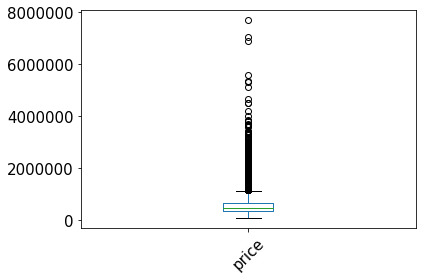

In [64]:
# Boxplot 
boxplot = data_df.boxplot(column=['price'], grid=False, rot=45, fontsize=15)

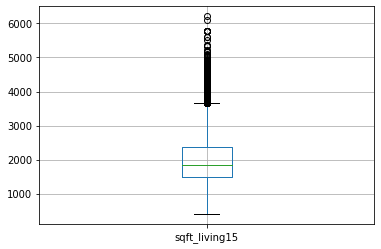

In [58]:
boxplot = data_df.boxplot(column=['sqft_living15'])

In [43]:
# data_df = pd.get_dummies(data_df['condition'])

In [65]:
# Drop some columns. These columns will be droped
data = data_df.drop(['date', 'zipcode', 'lat', 'long', 'view'], axis = 1)
data_1 = pd.get_dummies(data, columns=['condition'])
data_1.columns

Index(['id', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'grade', 'sqft_above', 'sqft_basement',
       'yr_built', 'yr_renovated', 'sqft_living15', 'sqft_lot15',
       'condition_1', 'condition_2', 'condition_3', 'condition_4',
       'condition_5'],
      dtype='object')

#### CREATE "YEAR" COLUMN TO GROUP THE DATASET

In [86]:
# Create a list by Iterating over the Date column and pick the Year
column = []
num = 0
while num < len(data_df):
    column.append(data_df['date'][num][-4:])
    num += 1

# Create another column "Date" with the column list created
data_df['year'] = column

In [88]:
year = data_df.groupby('year')

# Split the dataframe to year_2014 and year_2015
year_2014 = year.get_group('2014')
year_2015 = year.get_group('2015')

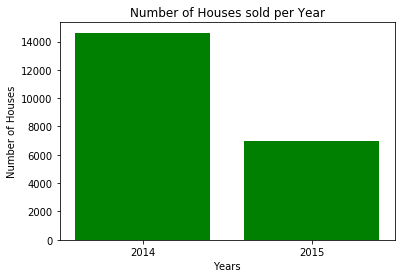

In [89]:
ax = plt.subplot()
condition_bar = ['2014', '2015']
grade_bar = [len(year_2014), len(year_2015)]
plt.bar(range(len(condition_bar)), grade_bar, color = 'green')
ax.set_xticks(range(0, len(condition_bar)))
ax.set_xticklabels(condition_bar)
plt.title('Number of Houses sold per Year')
plt.xlabel('Years')
plt.ylabel('Number of Houses')
plt.show()

> More than half of the Houses were sold in the year 2014

#### EXPLORE THE DATASET BY THE STATE OF THE CONDITION OF THE HOUSES SOLD

In [92]:
# Check the unique entries in the 'condition' column
data_df['condition'].unique()

array(['Good', 'Excellent', 'Very_Good', 'Bad', 'Not_Good'], dtype=object)

In [93]:
condition = data_df.groupby('condition') # Group the data based on condition

# Create different dataframe for each group
bad = condition.get_group('Bad')
not_good = condition.get_group('Not_Good')
good = condition.get_group('Good')
very_good = condition.get_group('Very_Good')
excellent = condition.get_group('Excellent')

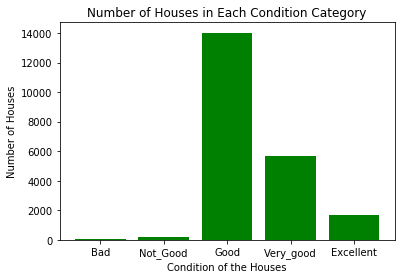

In [94]:
# Bar Chart
ax = plt.subplot()
condition_bar = ['Bad', 'Not_Good', 'Good', 'Very_good', 'Excellent']
grade_bar = [len(bad), len(not_good), len(good), len(very_good), len(excellent)]
plt.bar(range(len(condition_bar)), grade_bar, color = 'green')
ax.set_xticks(range(0, len(condition_bar)))
ax.set_xticklabels(condition_bar)
plt.title('Number of Houses in Each Condition Category')
plt.xlabel('Condition of the Houses')
plt.ylabel('Number of Houses')
plt.show()

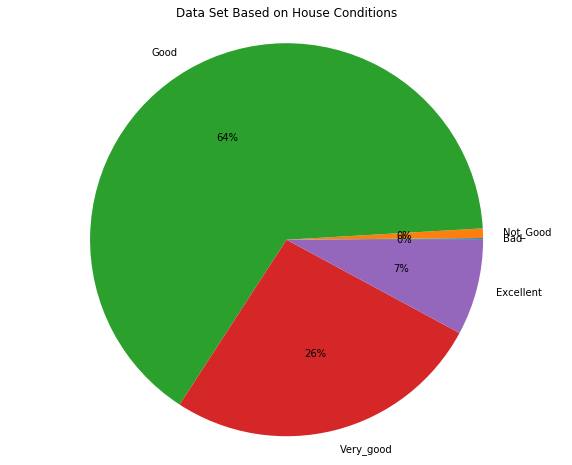

In [95]:
# Pie Chart
num = [len(bad), len(not_good), len(good), len(very_good), len(excellent)]
plt.figure(figsize=(10, 8))
plt.pie(num, labels=condition_bar, autopct="%1d%%")
plt.axis('equal')
plt.title('Data Set Based on House Conditions')
plt.show()

> The Dataset is biased. Most of the houses sold were in "Good" condition. This will really negatively affect the price prediction 

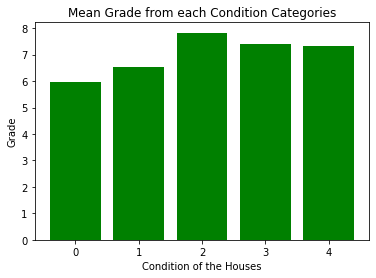

In [96]:
# Display the Average Grade in each condition categories

grade_bar = [bad['grade'].mean(), not_good['grade'].mean(), good['grade'].mean(), very_good['grade'].mean(), excellent['grade'].mean()]
plt.bar(range(len(condition_bar)), grade_bar, color = 'green')
plt.title('Mean Grade from each Condition Categories')
plt.xlabel('Condition of the Houses')
plt.ylabel('Grade')
plt.show()

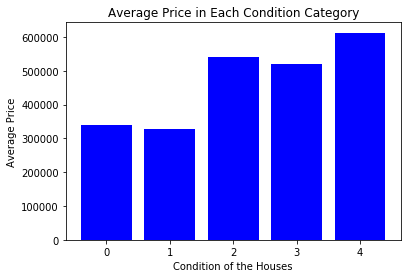

In [97]:
# Display the average price in each condition categories

price_bar = [bad['price'].mean(), not_good['price'].mean(), good['price'].mean(), very_good['price'].mean(), excellent['price'].mean()]
plt.bar(range(len(condition_bar)), price_bar, color = 'blue')
plt.title('Average Price in Each Condition Category')
plt.xlabel('Condition of the Houses')
plt.ylabel('Average Price')
plt.show()

<div class="alert alert-block alert-info">
    
### SECTION 3: MULTICOLLINEARITY CHECK

<a id="section_4"></a>

* click here to go back to [Table of Contents](#section_0)

> The precision in estimatiing an important regression coefficient or in predicting a response may be decreased if too many explanatory variables are included in the model. When a variable can can be explained well by the additional variables - a condition called **MultiCollinearity** - the variance inflation factor can be very high. The problem of multicollinearity is that the coefficient estimates tend to be unreliable. The standard errors of the slope coeeficients become artificially inflated. This leads to a greater problem that will incorrectly conclude that a variable is not statistially significant <br>
Because of these drawbacks, we are going to check for multicollinearity

In [45]:
# Print a correlation matrix of the dataframe
corr = data_1.corr()

# Display the correlation
display(corr)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15,condition_Bad,condition_Excellent,condition_Good,condition_Not_Good,condition_Very_Good
price,1.000000,0.308787,0.525906,0.701917,0.089876,0.256804,0.264306,0.667951,0.605368,0.322192,0.053953,0.118125,0.585241,0.082845,-0.019886,0.057531,0.006948,-0.051432,-0.030759
bedrooms,0.308787,1.000000,0.514508,0.578212,0.032471,0.177944,-0.002127,0.356563,0.479386,0.299037,0.155670,0.016887,0.393406,0.030690,-0.032520,0.027500,0.005210,-0.049463,-0.009841
bathrooms,0.525906,0.514508,1.000000,0.755758,0.088373,0.502582,0.063629,0.665838,0.686668,0.279541,0.507173,0.046204,0.569884,0.088303,-0.042932,-0.034765,0.190790,-0.075933,-0.166756
sqft_living,0.701917,0.578212,0.755758,1.000000,0.173453,0.353953,0.104637,0.762779,0.876448,0.430190,0.318152,0.050438,0.756402,0.184342,-0.033246,-0.018284,0.102061,-0.063984,-0.083850
sqft_lot,0.089876,0.032471,0.088373,0.173453,1.000000,-0.004814,0.021459,0.114731,0.184139,0.015293,0.052946,0.004161,0.144763,0.718204,0.006265,-0.014452,-0.011589,0.037871,0.013284
floors,0.256804,0.177944,0.502582,0.353953,-0.004814,1.000000,0.020797,0.458794,0.523989,-0.242359,0.489193,0.003198,0.280102,-0.010722,-0.023029,-0.120546,0.317725,-0.055337,-0.257672
waterfront,0.264306,-0.002127,0.063629,0.104637,0.021459,0.020797,1.000000,0.082818,0.071778,0.083779,-0.024487,0.074099,0.083823,0.030658,0.012406,0.013637,-0.017498,-0.000954,0.009785
grade,0.667951,0.356563,0.665838,0.762779,0.114731,0.458794,0.082818,1.000000,0.756073,0.166397,0.447865,0.015085,0.713867,0.120981,-0.052897,-0.083974,0.196419,-0.084788,-0.140140
sqft_above,0.605368,0.479386,0.686668,0.876448,0.184139,0.523989,0.071778,0.756073,1.000000,-0.051781,0.424037,0.020045,0.731767,0.195077,-0.027236,-0.088596,0.194238,-0.057698,-0.142520
sqft_basement,0.322192,0.299037,0.279541,0.430190,0.015293,-0.242359,0.083779,0.166397,-0.051781,1.000000,-0.131202,0.066006,0.199577,0.016420,-0.017392,0.124712,-0.146876,-0.025129,0.089413


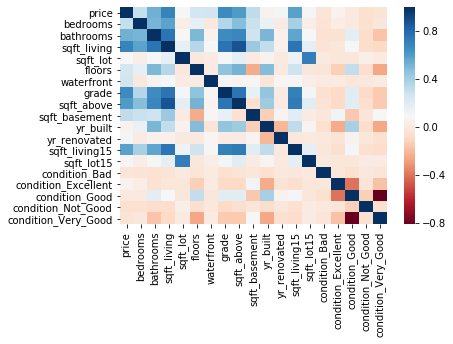

In [46]:
# plot a heatmap
sns.heatmap(corr, xticklabels = corr.columns, yticklabels = corr.columns, cmap = "RdBu")

> Checking the heatmap with the correlation matrix, we can identify some highly correlated variables like sqft_above and sqft_living, sqft_lot and sqft_lot15, grade and sqft_above and so on. <br>
> We are going to use **Variance Inflation Factor (VIF)** to systematically remove highly correlated variables. VIF is defined in the statsmodel API. The **Variance Inflation Factor** is a measure of the increase of the variance of the parameter estimates if additional variable, given by **exog_idx** is added to the linear regression. It is a measure for Multicollinearity of the design matrix, **exog** <br>
The recommendation is that if any of our variables come back with a value greater than 5, then they should be removed from the model.

In [47]:
# Create two dataframes, one to store the initial dataframe before applying the VIF API and
# the other to store the final dataframe after VIF API is applied
data_1_before = data_1
x1 = sm.tools.add_constant(data_1_before)

# Create series for both dataframe
series_before = pd.Series([variance_inflation_factor(x1.values, i) for i in range(x1.shape[1])], index = x1.columns)

# Display the series
print('VIF BEFORE DROPPING COLUMNS')
print('-'*100)
display(series_before)

C:\Users\adara\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
C:\Users\adara\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1636: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


VIF BEFORE DROPPING COLUMNS
----------------------------------------------------------------------------------------------------


C:\Users\adara\Anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:185: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


const                    0.000000
price                    2.845104
bedrooms                 1.667777
bathrooms                3.391672
sqft_living            202.350180
sqft_lot                 2.086803
floors                   1.951297
waterfront               1.106103
grade                    3.686154
sqft_above             164.217926
sqft_basement           46.004877
yr_built                 2.232875
yr_renovated             1.119039
sqft_living15            2.785071
sqft_lot15               2.121396
condition_Bad                 inf
condition_Excellent           inf
condition_Good                inf
condition_Not_Good            inf
condition_Very_Good           inf
dtype: float64

> We are going to drop some columns with **VIF** value greater than 5 conditioned on our suspicion above based on correlation matrix. Then we are going to recalculate the **VIF**

In [48]:
data_1_after = data_1.drop(['sqft_above', 'sqft_basement', 'bathrooms','condition_Very_Good'], axis=1)
x2 = sm.tools.add_constant(data_1_after)
series_after = pd.Series([variance_inflation_factor(x2.values, i) for i in range(x2.shape[1])], index = x2.columns)

# Display the series
print('VIF AFTER DROPPING COLUMNS')
print('-'*100)
display(series_after)

VIF AFTER DROPPING COLUMNS
----------------------------------------------------------------------------------------------------


const                  7981.692351
price                     2.814546
bedrooms                  1.600466
sqft_living               4.727663
sqft_lot                  2.081895
floors                    1.533292
waterfront                1.104963
grade                     3.652262
yr_built                  1.944570
yr_renovated              1.103729
sqft_living15             2.685082
sqft_lot15                2.116375
condition_Bad             1.009476
condition_Excellent       1.225269
condition_Good            1.429100
condition_Not_Good        1.029154
dtype: float64

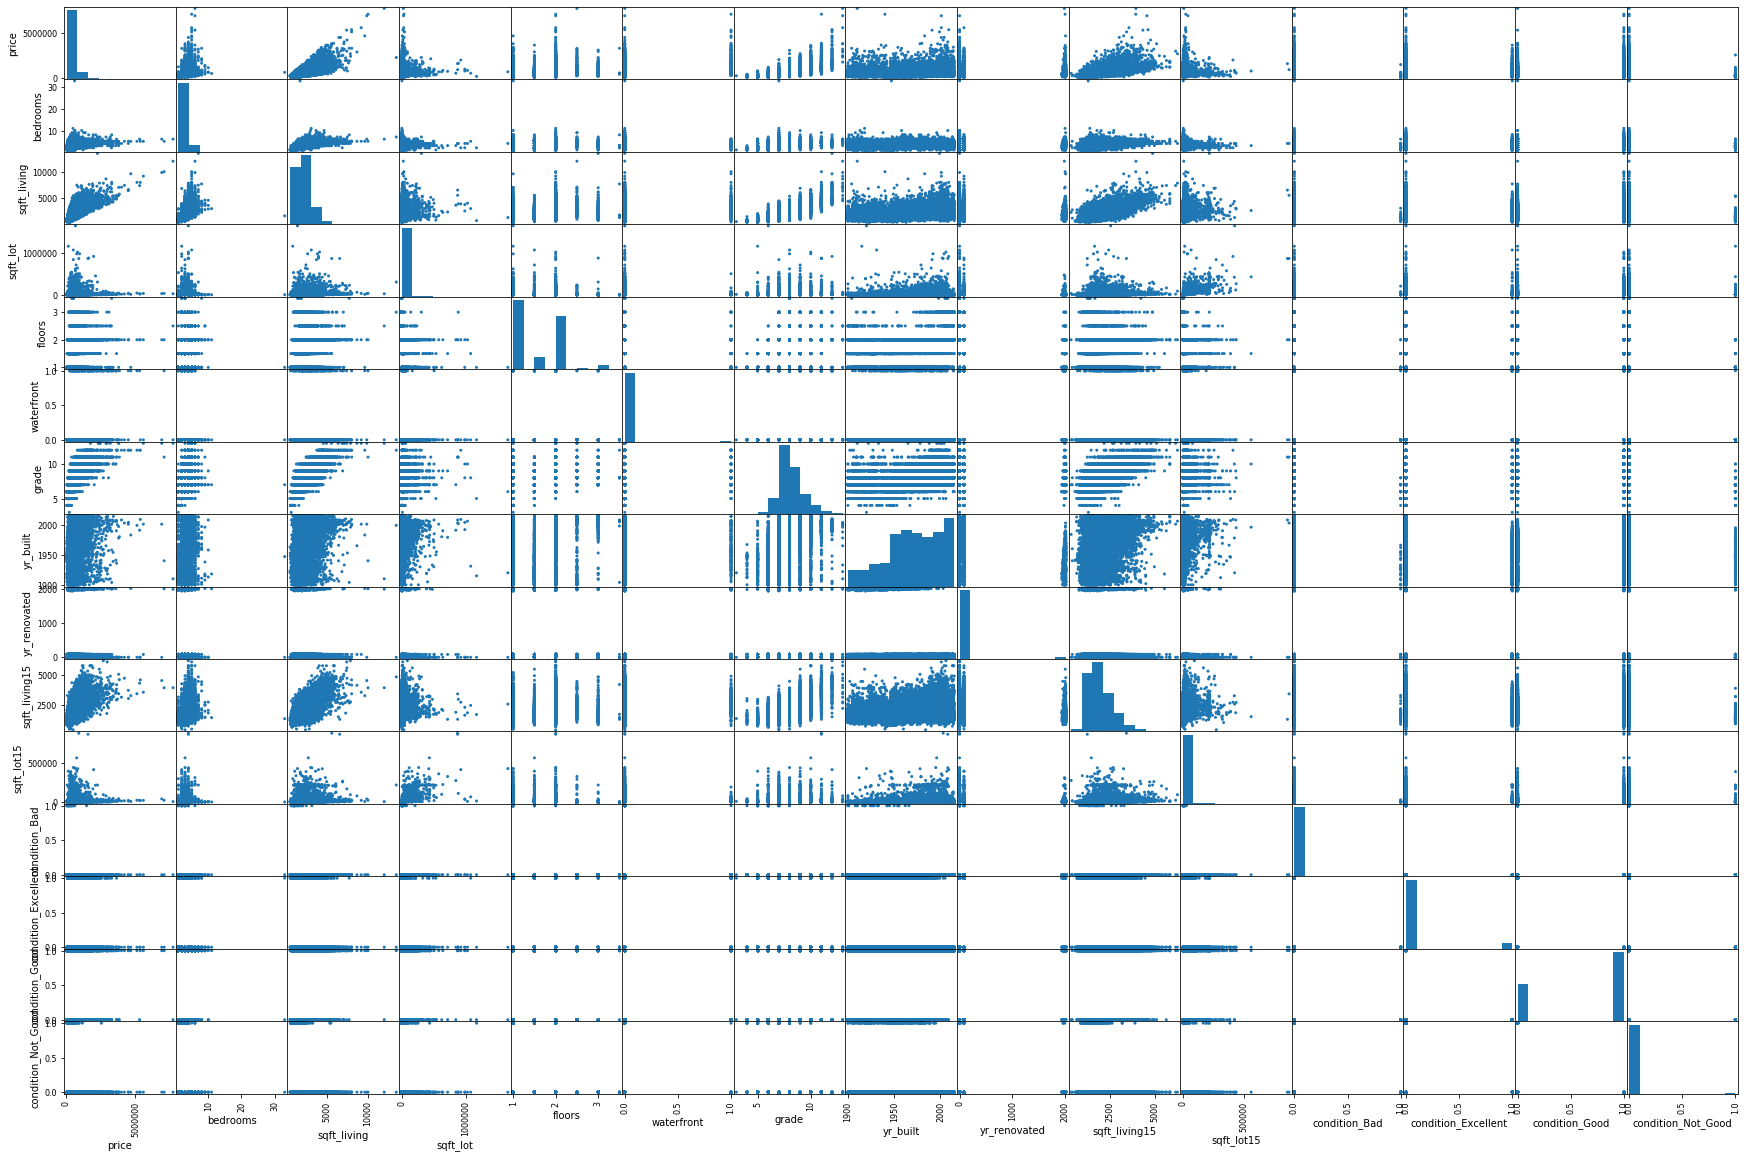

In [49]:
# We can display the scatter plot
pd.plotting.scatter_matrix(data_1_after, alpha = 1, figsize = (30, 20))

# Show the plot
plt.show()

<div class="alert alert-block alert-info">
    
### SECTION 4: BUILD THE MODEL

<a id="section_5"></a>

* click here to go back to [Table of Contents](#section_0)

> We have loaded, cleaned and explored the data. We can now proceed to building the model. We have selected the independent variables that we need to predict the **Key Performace Indicator**. We are going to split the dataset into **Training and Testing Dataset**. The training set will be named **x_train, y_train** and the test set **x_test, y_test**

> After splitting the dataset, we are going to create an instance of the linear regression model and pass through the x_train and y_train 

In [51]:
data_1_after.columns

Index(['price', 'bedrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront',
       'grade', 'yr_built', 'yr_renovated', 'sqft_living15', 'sqft_lot15',
       'condition_Bad', 'condition_Excellent', 'condition_Good',
       'condition_Not_Good'],
      dtype='object')

In [52]:
# Get the input and output variables
dfx = data_1_after.drop('price', axis = 1)
dfy = data_1_after[['price']]

# Split the dataset to training and testing dataset
x_train, x_test, y_train, y_test = train_test_split(dfx, dfy, test_size = 0.20, random_state = 1)

# Create an instance for our model
regression_model = LinearRegression()

# Fit the model
regression_model.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

#### Exploring the Output
> Since the data now fitted to the model, we can explore the ouput. We will print out the
Intercept and each of the coefficients of the model

In [53]:
# Print the Intercept and coefficients
intercept = regression_model.intercept_[0]
coeff = regression_model.coef_[0][0]

print("The Intercept for the model is {:.4}".format(intercept))
print('-'*100)

# Loop thru the dictionary to print the coefficients
for coef in zip(dfx.columns, regression_model.coef_[0]):
    print("The coefficient for {} is {:.2}".format(coef[0], coef[1]))

The Intercept for the model is 6.049e+06
----------------------------------------------------------------------------------------------------
The coefficient for bedrooms is -3.7e+04
The coefficient for sqft_living is 1.9e+02
The coefficient for sqft_lot is 0.029
The coefficient for floors is 3.4e+04
The coefficient for waterfront is 7.7e+05
The coefficient for grade is 1.2e+05
The coefficient for yr_built is -3.5e+03
The coefficient for yr_renovated is 2.4e+01
The coefficient for sqft_living15 is 2.3e+01
The coefficient for sqft_lot15 is -0.65
The coefficient for condition_Bad is -7.8e+03
The coefficient for condition_Excellent is 4.2e+04
The coefficient for condition_Good is -1.7e+04
The coefficient for condition_Not_Good is -2.7e+04


> The intercept **6,049,000** is the price when all the dependent variables are equal to zero. The coefficients are slopes which are interpreted as for a unit change in dependent variables, price changes for the value of the coefficient. For example, the coefficient of **sqft_living** is **190**, this implies that for a unit increase in sqft living, the price increases by **190** while holding all other variables constant.

> We can now make a prediction on the test data

In [54]:
# Get the multiple prediction
y_predict = regression_model.predict(x_test)

# Show the first 10
y_predict[:10]

array([[213588.31947379],
       [158974.31847483],
       [402266.50810776],
       [391014.37260197],
       [607632.54857889],
       [272796.03883092],
       [284441.44589491],
       [321795.0115287 ],
       [630958.2106782 ],
       [254884.38038602]])

<div class="alert alert-block alert-info">

### SECTION 5: EVALUATING THE MODEL

<a id="section_6"></a>

* click here to go back to [Table of Contents](#section_0)

#### Using the Statsmodel
> We will be using this module to validate all the assumptions. For details of the assumption, click here to read [Assumptions of the Model](#section_1). We will be using **OLS() method** and **fit()**.

In [55]:
# Create the input
dfx2 = sm.add_constant(dfx)

# Create an OLS model
model = sm.OLS(dfy, dfx2)

# Fit the model
est = model.fit()

C:\Users\adara\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


#### Checking for Heteroscedasticity
If you need to read more about this statistical term, click __[Here](https://statisticsbyjim.com/regression/heteroscedasticity-regression/)__

#### How to test for Heteroscedasticity
We can import the **statsmodels.stats.diagnostics** module and get access to Breusch-Pagan and white test for Heteroscedasticity
* The null Hypothesis for both the White teast and Breusch-Pagan test is that the variances for the errors are equal
* The alternative hypothesis is that the variances are not equal (or atleast one is different)

The goal is to fail to reject the null hypothesis, have a high p-value which implies that we have no heteroscedasticity


In [56]:
# Running white test
_, pval, _, f_pval = diag.het_white(est.resid, est.model.exog, retres = False)
print(pval, f_pval)
print('-'*100)

if pval > 0.05:
    print("For the White's Test")
    print("The p-value was {:.4}".format(pval))
    print("We reject the null hyothesis, so there is no heteroscedasticity.")
else:
    print("For the Breusch-Pagan's Test")
    print("The p-value was {:.4}".format(pval))
    print("We reject the null hyothesis, so there is heteroscedasticity.")
_, pval, _, f_pval = diag.het_breuschpagan(est.resid, est.model.exog)
print(pval, f_pval)
print('-'*100)

if pval > 0.05:
    print("For the Breusch-Pagan's Test")
    print("The p-value was {:.4}".format(pval))
    print("We reject the null hyothesis, so there is no heteroscedasticity.")
else:
    print("For the Breusch-Pagan's Test")
    print("The p-value was {:.4}".format(pval))
    print("We reject the null hyothesis, so there is heteroscedasticity.")

AssertionError: 

#### Check for Autocorrelation
Autocorrelation refers to the degree of correlation between the values of the same variables across different observations in the data
* Null Hypothesis: The data are random
* Alternative Hypothesis: The data are not random

The number of lags will be 10
----------------------------------------------------------------------------------------------------
(array([ 2.65900579,  2.77506869,  2.77701756,  3.00532556,  3.44220631,
        7.36710439,  7.38807087, 10.72970385, 10.95049685, 13.93372199]), array([0.10296508, 0.2496902 , 0.42729722, 0.55693458, 0.63215002,
       0.28822714, 0.38962187, 0.21748985, 0.2791174 , 0.17603628]))
The lowest p-value found was 0.103
We fail to reject the null hypothesis, so there is no autocorrelation
----------------------------------------------------------------------------------------------------


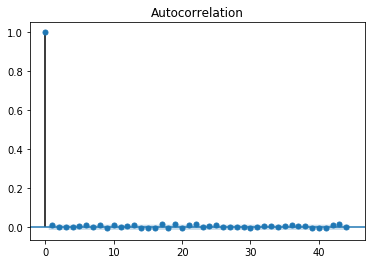

In [57]:
# calculate the lag
lag = min(10, (len(dfx)//5))
print('The number of lags will be {}'.format(lag))
print('-'*100)

# Perform ljung-Box test
test_results =diag.acorr_ljungbox(est.resid, lags = lag)
print(test_results)

# Pick the p-value and the test statistics
ibvalue, pvalue = test_results

# Print the result
if min(pvalue) > 0.05:
    print("The lowest p-value found was {:.4}".format(min(pvalue)))
    print("We fail to reject the null hypothesis, so there is no autocorrelation")
    print('-'*100)
else:
    print("The lowest p-value found was {:.4}.format(min(pvalue))")
    print("We reject the null hypothesis, so there is autocorrelation")
    print('-'*100)
    
# plot the autocorrelation
sm.graphics.tsa.plot_acf(est.resid)
plt.show()

#### Checking that the Residual is normally distributed
We are going to be using visuals to proof this assumptions. This will require using a QQ pplot

#### Checking that the Mean of the residuals Equals 0
We also need to check that the mean of the residual is 0. If the mean is very close to zero, then we are good

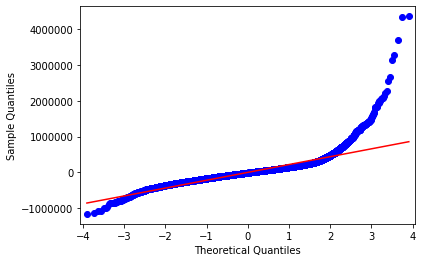

-4.200665260386416e-08

In [58]:
# Check for the normality
sm.qqplot(est.resid, line = 's')
pylab.show()

# Check that the mean of the residual = 0
mean_residuals = sum(est.resid) / len(est.resid)
mean_residuals

> the value is approximately 0

#### Calculate the Measure of Error
We will be calculating all these error type using the y_test and x_test
* Mean Absolute Error (MAE): which is the mean of the absolute value of errors
* Mean Squared Error (MSE): which is the mean of the squared errors
* Root Mean Squared Error (RMSE): which is the square root of the mean of the squared errors

In [59]:
# Calculate the mean squared error
model_mse = mean_squared_error(y_test, y_predict)

# Calculate the mean absolute error
model_mae = mean_absolute_error(y_test, y_predict)

# Calculate the root mean squared error
model_rmse = math.sqrt(model_mse)

# Display the output
print("MSE {:.3}".format(model_mse))
print("MAE {:.3}".format(model_mae))
print("RMSE {:.3}".format(model_rmse))


MSE 4.46e+10
MAE 1.4e+05
RMSE 2.11e+05


> These value are approximately equal to 0. The model is well behaved

#### Confidence Intervals


In [60]:
est.conf_int()

,0,1
const,5.726446e+06,6.223527e+06
bedrooms,-4.099949e+04,-3.308051e+04
sqft_living,1.820285e+02,1.949206e+02
sqft_lot,-8.810223e-02,1.154846e-01
floors,2.556240e+04,3.894163e+04
waterfront,7.177951e+05,7.900018e+05
grade,1.217520e+05,1.306547e+05
yr_built,-3.563389e+03,-3.301562e+03
yr_renovated,1.541451e+01,3.233115e+01
sqft_living15,2.110501e+01,3.505811e+01


#### Hypothesis Testing
* Null Hypothesis: There is no relationship between the exploratory variables and the response variable
* Alternative Hypothesis: There is a relationship between the exploratory variable and the response variable
***
* If we **Reject the Null**, then there is a relationship, and the coefficients do not equal to 0
* if we **fail to reject the Null**, then there is no relationship, and the coeeficients do equal to 0

In [61]:
est.pvalues

const                  0.000000e+00
bedrooms               1.573475e-74
sqft_living            0.000000e+00
sqft_lot               7.920679e-01
floors                 3.725763e-21
waterfront             0.000000e+00
grade                  0.000000e+00
yr_built               0.000000e+00
yr_renovated           3.200392e-08
sqft_living15          3.175862e-15
sqft_lot15             1.297792e-14
condition_Bad          7.719357e-01
condition_Excellent    3.445493e-14
condition_Good         5.060396e-05
condition_Not_Good     2.298840e-01
dtype: float64

we can see that all the p-values are less than 0.05. So we **reject the Null hypothesis** which implies that there is a relationship between the exploratory variables and the coefficient is not equal to 0

#### Create the Summary of the Model Output

In [63]:
print(est.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.645
Model:                            OLS   Adj. R-squared:                  0.644
Method:                 Least Squares   F-statistic:                     2797.
Date:                Tue, 08 Oct 2019   Prob (F-statistic):               0.00
Time:                        15:26:37   Log-Likelihood:            -2.9622e+05
No. Observations:               21597   AIC:                         5.925e+05
Df Residuals:                   21582   BIC:                         5.926e+05
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                5.975e+06   1

We are going to remove all the variables with p-vallue greater than 0.05

<div class="alert alert-block alert-info">

### SECTION 6: REMOVE THE INSIGNIFICANT VARIABLES

<a id="section_7"></a>

* click here to go back to [Table of Contents](#section_0)

We are going to drop all the insignificant variables and then re-train our model

In [64]:
# Get the input and output variables
data_after = data_1.drop(['sqft_above', 'sqft_basement', 'bathrooms','condition_Very_Good', 'condition_Bad', 'sqft_lot','condition_Not_Good'], axis=1)
x = data_after.drop('price', axis = 1)
y = data_after[['price']]

# Split the dataset to training and testing dataset
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state = 1)

# Create an instance for our model
regression_model = LinearRegression()

# Fit the model
regression_model.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [65]:
# Create the input
x2 = sm.add_constant(x)

# Create an OLS model
model = sm.OLS(y, x2)

# Fit the model
est = model.fit()

print(est.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.645
Model:                            OLS   Adj. R-squared:                  0.644
Method:                 Least Squares   F-statistic:                     3560.
Date:                Tue, 08 Oct 2019   Prob (F-statistic):               0.00
Time:                        15:26:46   Log-Likelihood:            -2.9622e+05
No. Observations:               21597   AIC:                         5.925e+05
Df Residuals:                   21585   BIC:                         5.926e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                5.971e+06   1

C:\Users\adara\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<div class="alert alert-block alert-info">

### SECTION 7: SAVING THE MODEL FOR FUTURE USE

<a id="section_8"></a>

* click here to go back to [Table of Contents](#section_0)

In [66]:
import pickle

# pickle the model

with open('my_multilinear_regression.sav', 'wb') as f:
    pickle.dump(regression_model, f)
    
# Load it back in
with open('my_multilinear_regression.sav', 'rb') as pickle_file:
    regression_model_2 = pickle.load(pickle_file)

# make a new prediction
#regression_model_2.predict([x_test.loc[0]])